# **Bike Sharing Demand Assignment**
---
### **Problem Statement**
---
> A US bike-sharing provider **BoomBikes** wants to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market to regain their profits after the pandemic. The company wants to know:
*  Which variables are significant in predicting the demand for shared bikes.
*  How well those variables describe the bike demands

So, You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features.






In [ ]:
from google.colab import drive

# This will prompt you to click on a link and generate an authorization code.
drive.mount('/content/drive')

Mounted at /content/drive


## **Step 1 : Understanding the Data**

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

# To avoid the unnecessary warning messeges
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Taking the glance at the data
share_bike_data = pd.read_csv('/content/drive/MyDrive/MS in AI & ML/Assignments/Bike Sharing/day.csv')
share_bike_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [ ]:
#checking the shape of the dataframe
share_bike_data.shape

(730, 16)

In [ ]:
#checking null values
share_bike_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
#getting info about the columns
share_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


* **It's a good sign as there is no null values in any columns.
Now let's look for the duplicate enteries in the dataset...**


In [ ]:
# Checking the duplicate enteries in the dataset
share_bike_data.duplicated().sum()

0

In [ ]:
# Renaming few columns for better readibility
share_bike_data.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [ ]:
share_bike_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### **Standradizing the Data**
---

> Since **"instant"** column is showing the index numbers, **"dteday"** column is very well compensated by year and month columns plus **"casual"** & **"registered"** columns are being encorporated in **"cnt"** column so dropping,
* **instant**
* **dteday**
* **casual**
* **registered**





In [ ]:
share_bike_data.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

* **Mapping the categorical variables**

In [ ]:
# mapping the season column
share_bike_data.season = share_bike_data.season.map({1:'spring', 2:'summer',
                                                     3:'fall', 4:'winter'})

# mapping the weekday column
share_bike_data.weekday = share_bike_data.weekday.map({0:'sun',1:'mon',2:'tue',
                                                       3:'wed',4:'thu',5:'fri',
                                                       6:'sat'})

# mapping the weathersit column
share_bike_data.weathersit = share_bike_data.weathersit.map({1:'Clear',2:'Misty',
                                                             3:'Light_snowrain',
                                                             4:'Heavy_snowrain'})

# mapping the month column
share_bike_data.month = share_bike_data.month.map({1:'jan',2:'feb',3:'mar',
                                                   4:'apr',5:'may',6:'june',
                                                   7:'july',8:'aug',9:'sep',
                                                   10:'oct',11:'nov',12:'dec'})

share_bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
#glance at the dataframe stats
share_bike_data.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## **Step 2 : Visualising the Data**

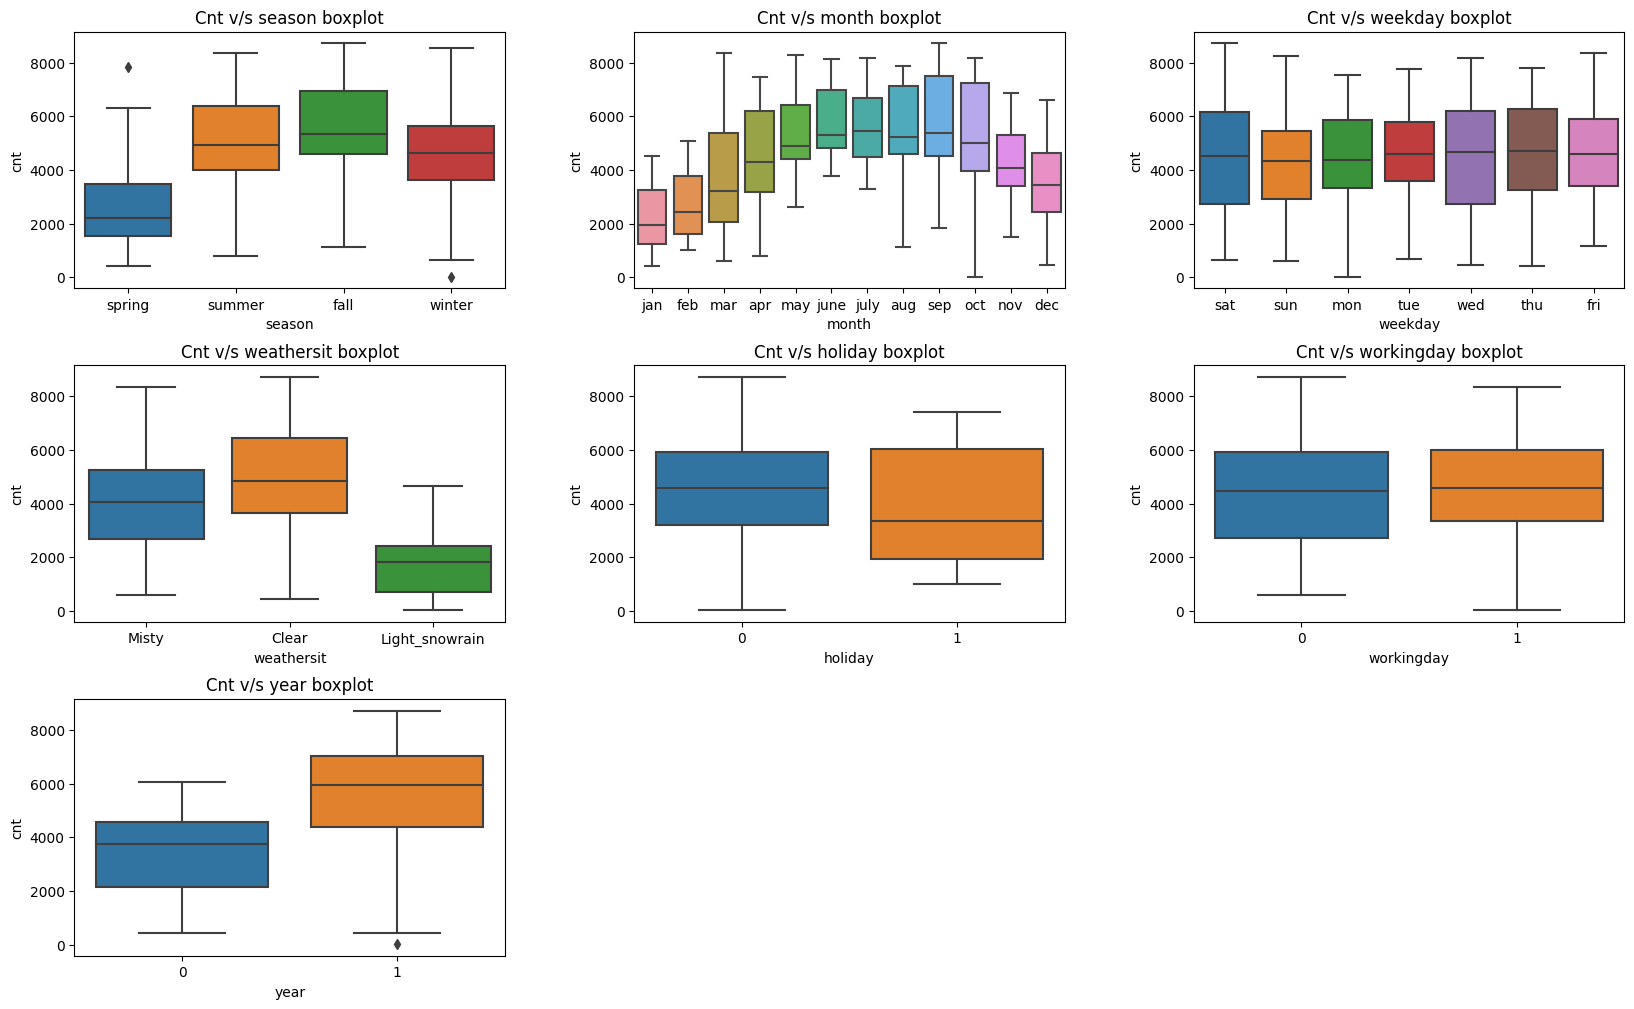

In [ ]:
# Analysing/visualizing the categorical columns to see how predictor variable stands against the target variable

categorical_features = ['season','month','weekday','weathersit',
                        'holiday','workingday','year']

plt.figure(figsize=(20, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig_no = 1
for column in categorical_features:
  plt.subplot(3, 3, fig_no)
  plt.title("Cnt v/s {} boxplot".format(column))
  sns.boxplot(data = share_bike_data, x = column, y = 'cnt')
  fig_no += 1
plt.show()

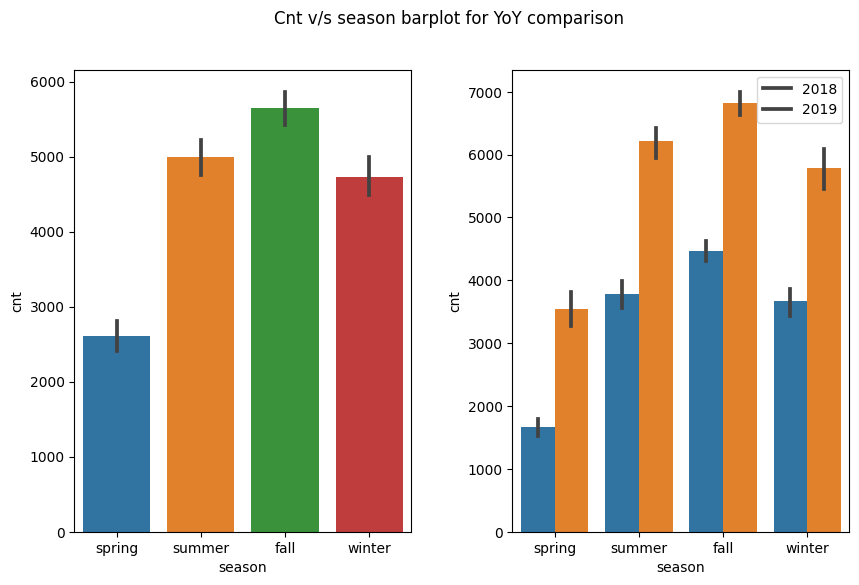

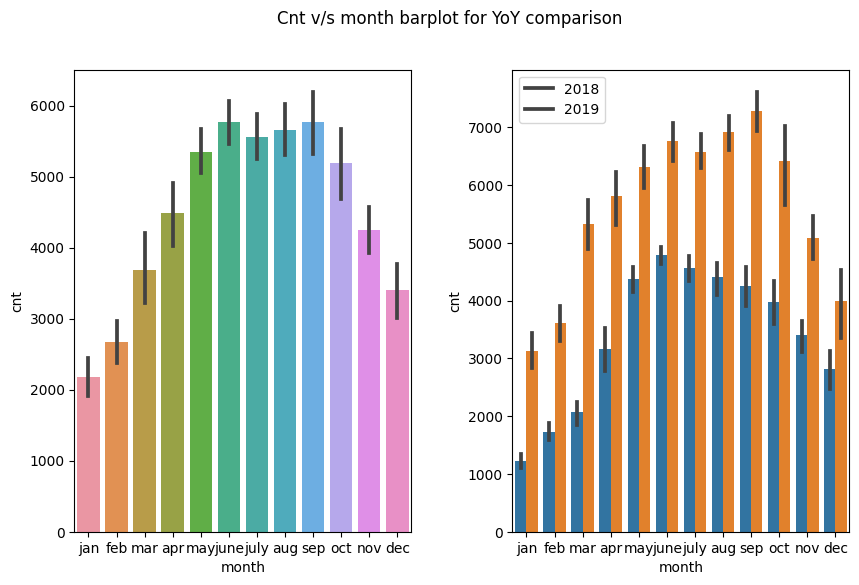

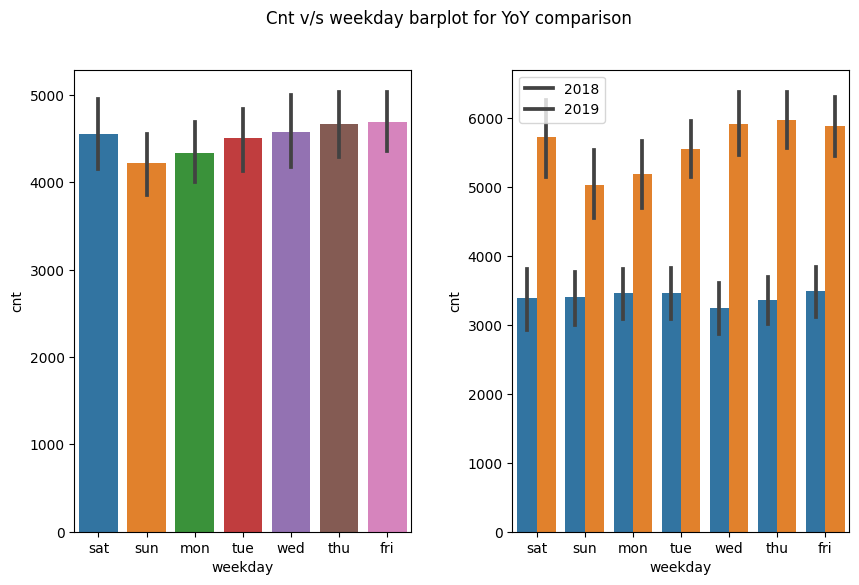

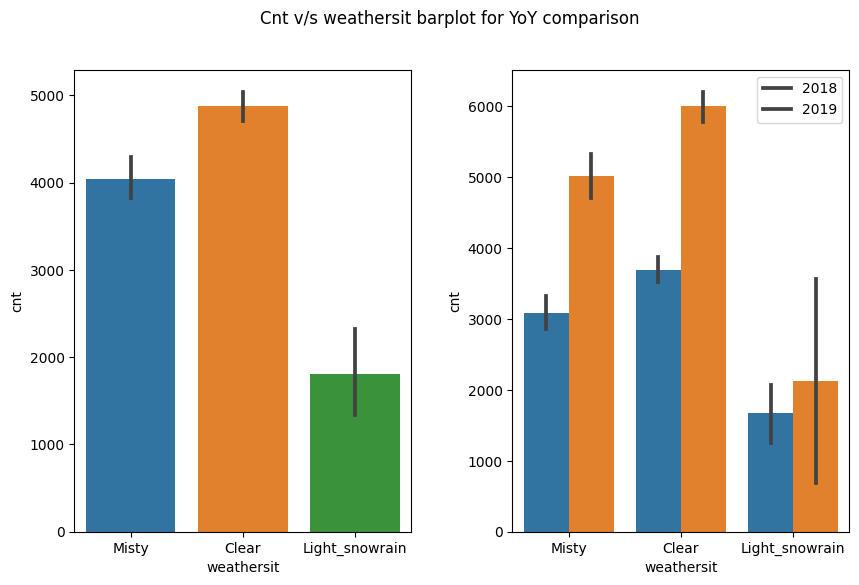

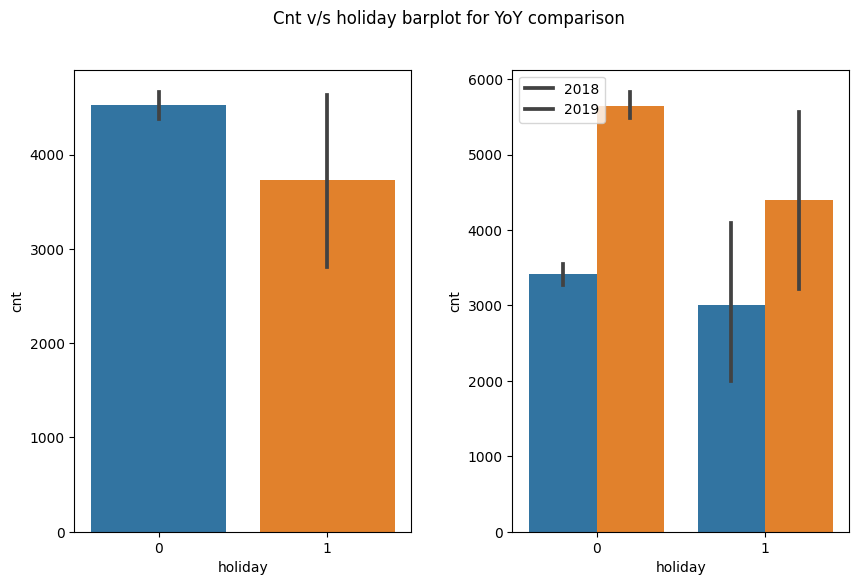

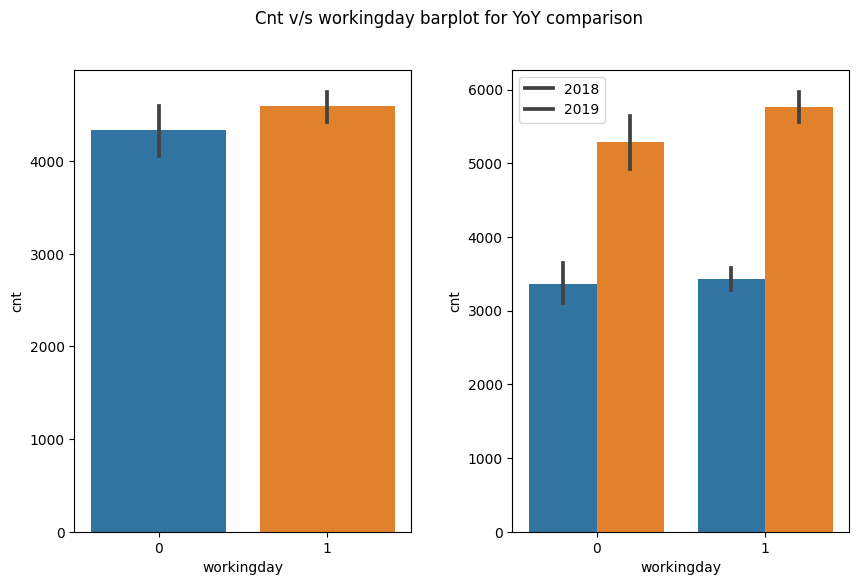

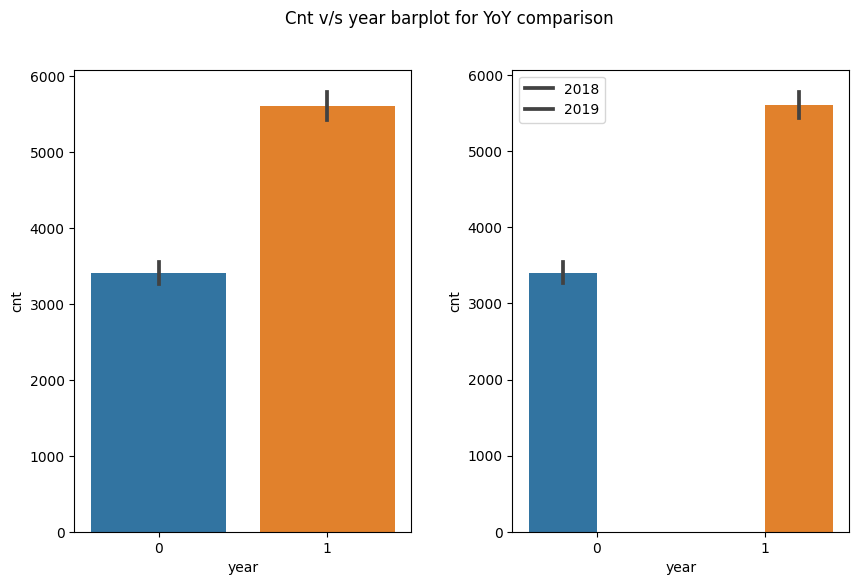

In [ ]:
# Let's plot these categorical columns wrt cnt and compare their YoY increase.

def compare_plot(data, column):
  plt.figure(figsize=(10, 6))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)
  plt.suptitle("Cnt v/s {} barplot for YoY comparison".format(column))
  plt.subplot(1,2,1)
  sns.barplot(data = data, x = column, y = 'cnt')
  plt.subplot(1,2,2)
  sns.barplot(data = data, x = column, y = 'cnt', hue = 'year')
  plt.legend(labels=['2018', '2019'])
  plt.show()

for column in categorical_features:
  compare_plot(share_bike_data, column)

### **Observations**
---
> * Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.
* Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year till mid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019.
* Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.
* Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.
* When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.
* Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.
* 2019 attracted more number of booking from the previous year, which shows good progress in terms of business.



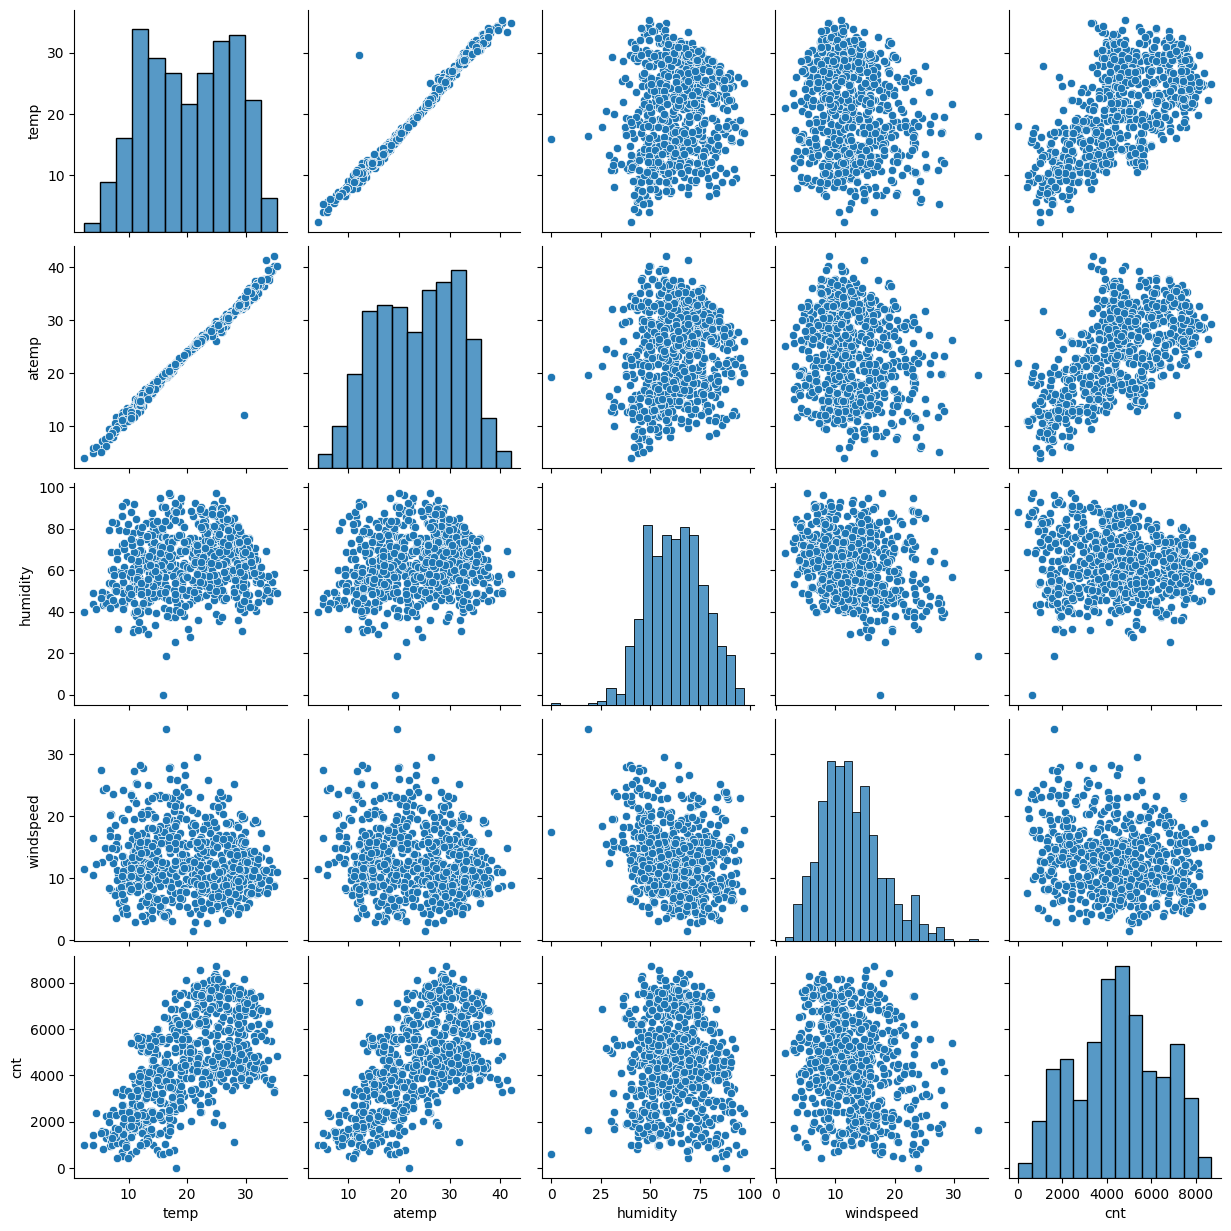

In [ ]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=share_bike_data,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

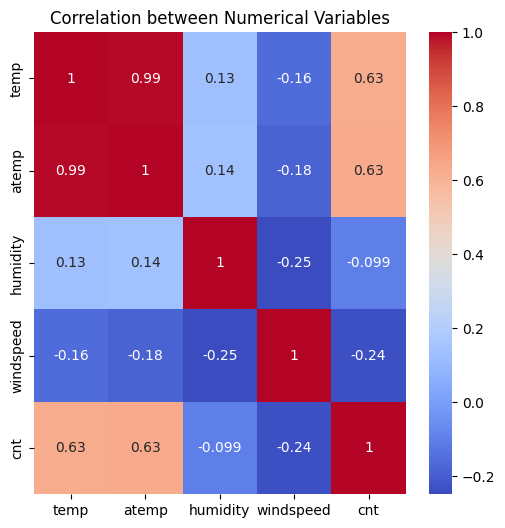

In [ ]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
Corr_matrix = share_bike_data[['temp','atemp','humidity','windspeed','cnt']].corr()
sns.heatmap(Corr_matrix, annot = True, cmap="coolwarm")
plt.title("Correlation between Numerical Variables")
plt.show()

* As **"temp"** and **"atemp"** has very high correlation so both of them can't be used in the model building as it can be the case of multicolinearity and will remove them based on their VIF and P-Value.

## **Step 3 : Preparing the Data**

In [ ]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_dm=pd.get_dummies(share_bike_data.month,drop_first=True)
weekdays_dm=pd.get_dummies(share_bike_data.weekday,drop_first=True)
weathersit_dm=pd.get_dummies(share_bike_data.weathersit,drop_first=True)
seasons_dm=pd.get_dummies(share_bike_data.season,drop_first=True)

In [ ]:
# let's concat those dummy dataframes to original one

share_bike_data = pd.concat([share_bike_data,months_dm,weekdays_dm,weathersit_dm,seasons_dm],axis=1)

In [ ]:
share_bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
share_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [ ]:
# dropping unnecessary columns as we have already created dummy variable out of it.

share_bike_data.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [ ]:
share_bike_data.shape

(730, 30)

## **Step 4 : Splitting the dataframe into training and testing data**

In [ ]:
# splitting the dataframe into Train and Test

np.random.seed(0)
share_bike_train, share_bike_test = train_test_split(share_bike_data, train_size = 0.7, random_state = 100)

In [ ]:
share_bike_train.shape

(510, 30)

In [ ]:
share_bike_test.shape

(220, 30)

In [ ]:
# let's scale the training data
scaler = MinMaxScaler()

# Applying the minmax scaler on the continuous data
cont_vars = ['temp','atemp','humidity','windspeed','cnt']
share_bike_train[cont_vars] = scaler.fit_transform(share_bike_train[cont_vars])

In [ ]:
share_bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


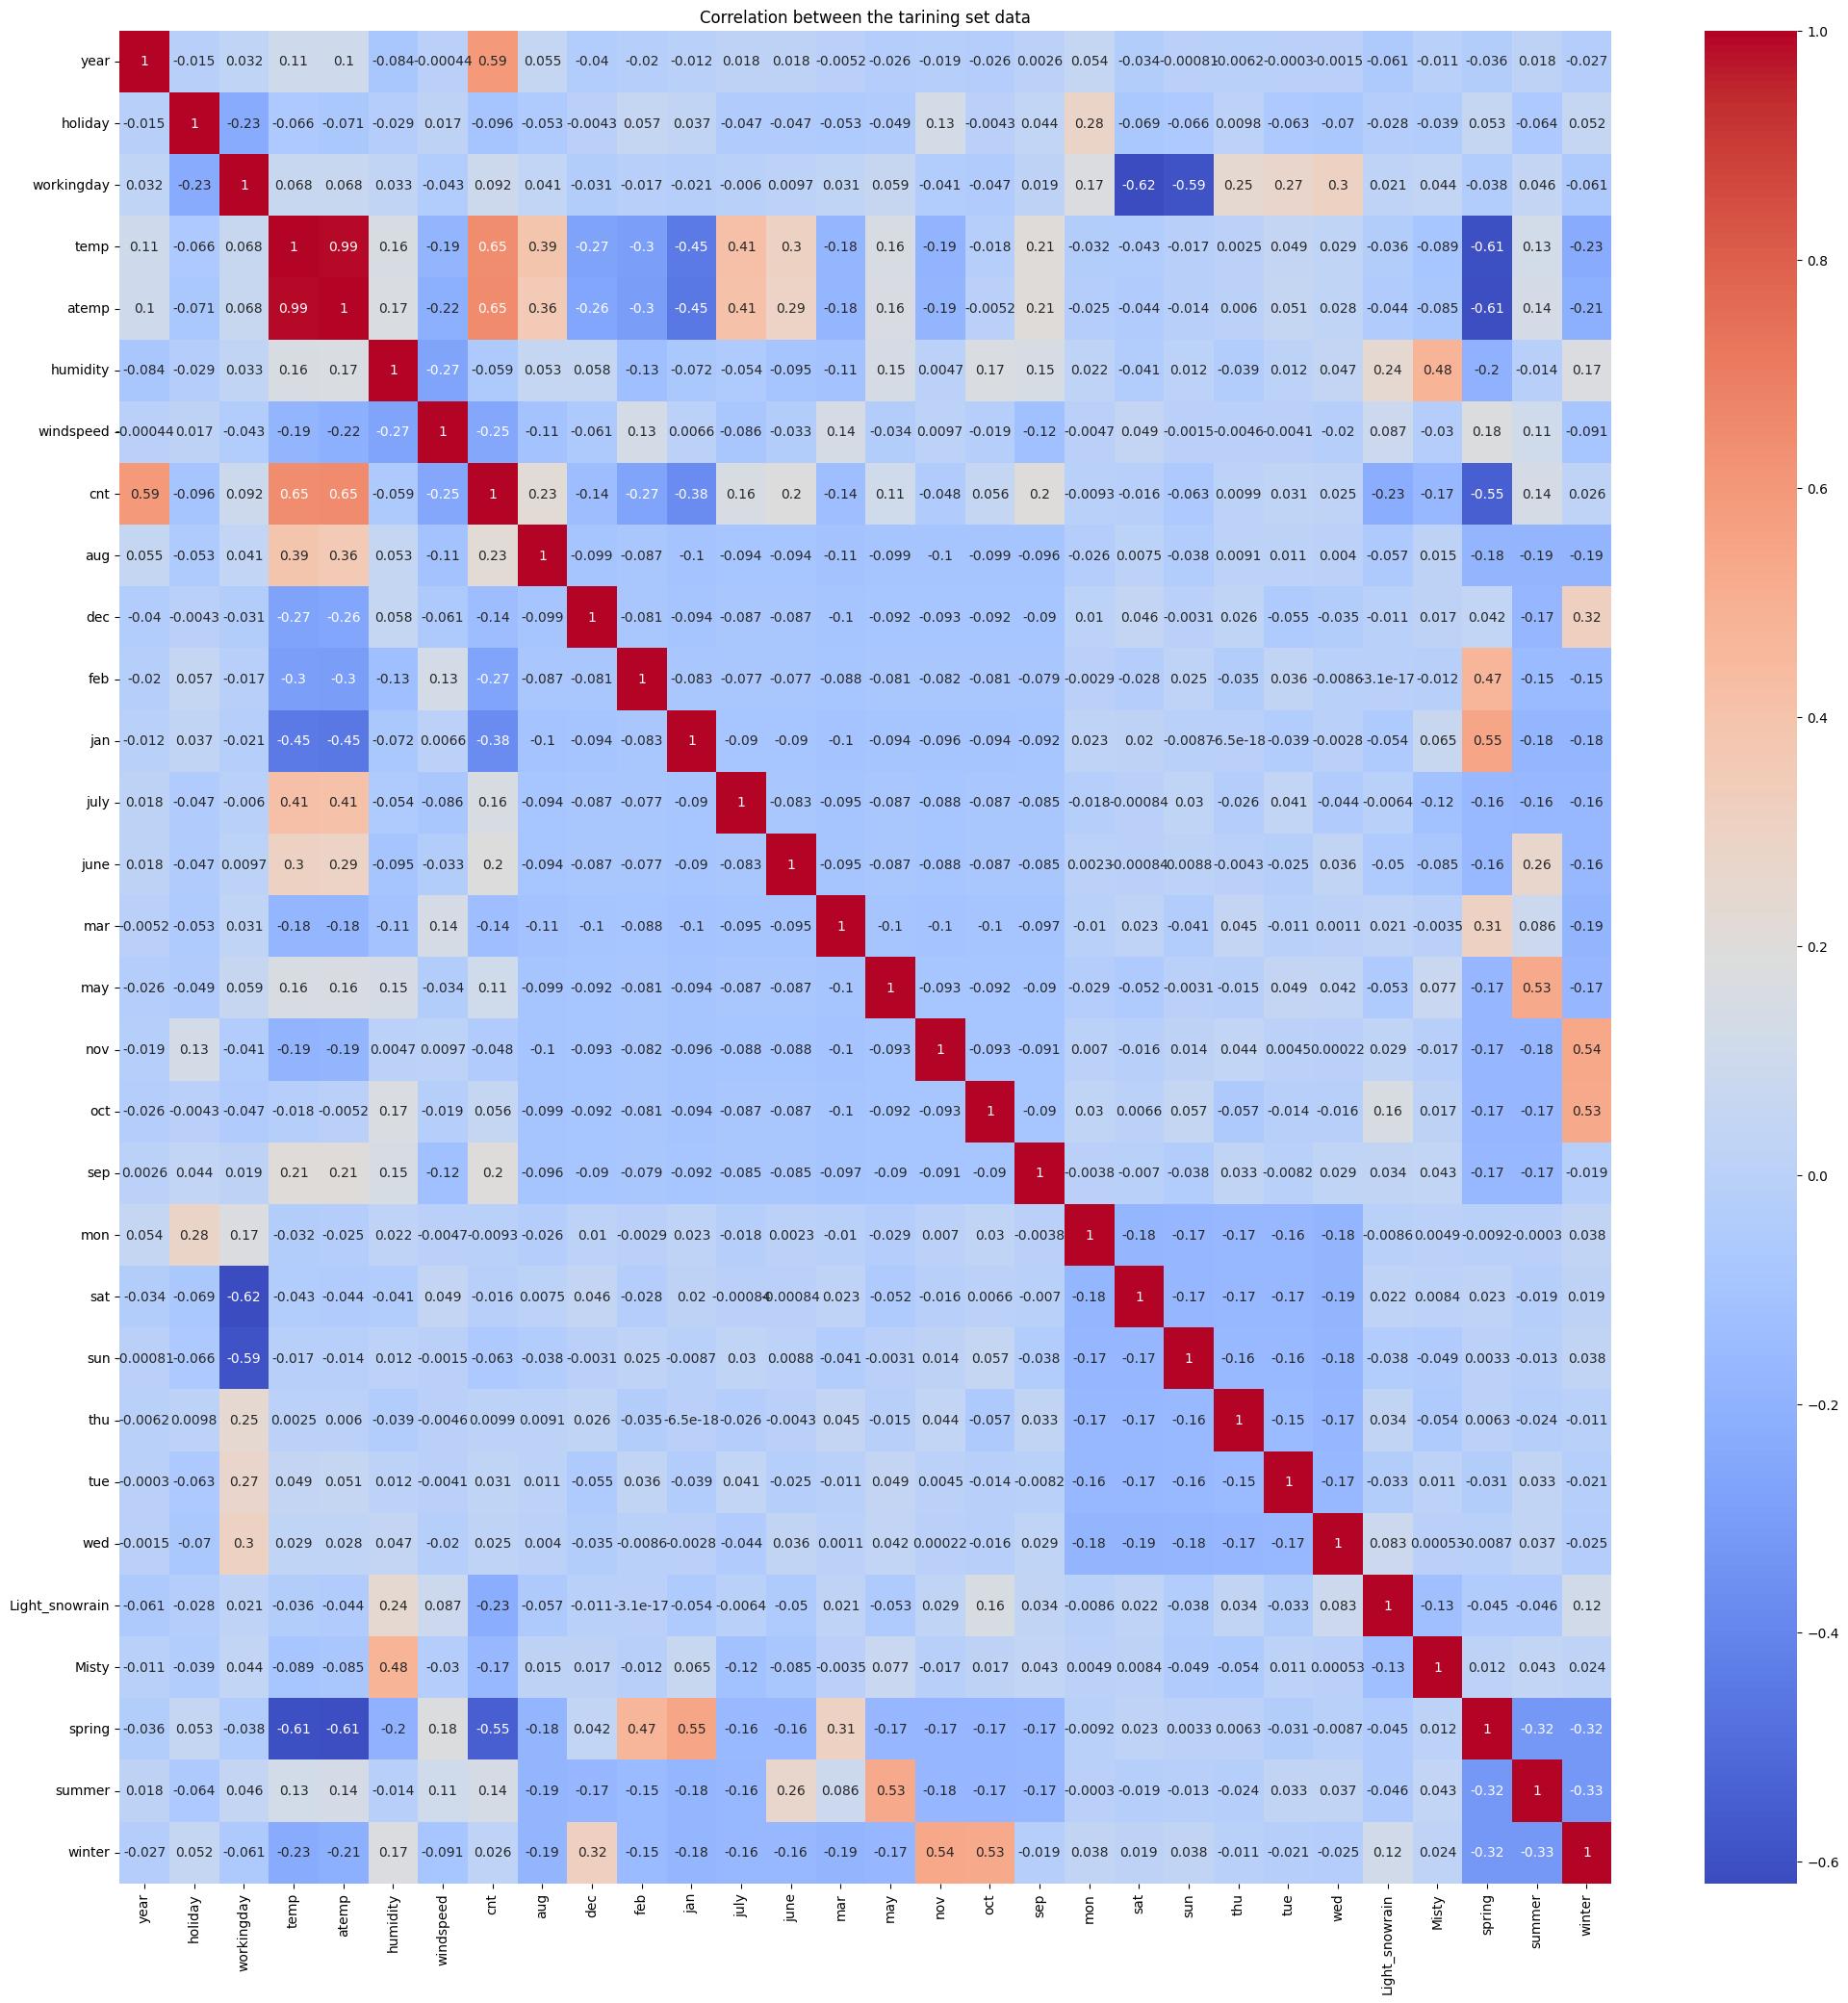

In [ ]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (25,25))
Corr_matrix = share_bike_train.corr()
sns.heatmap(Corr_matrix, annot = True, cmap="coolwarm")
plt.title("Correlation between the tarining set data")
plt.show()

* **"cnt"** seems to have correlation with **"year"** variable and **"temp"**.
* Similarly, **"Misty"** and **"humidity"** show correlation.
* **"Spring"** season with **"Jan"** and **"Feb"** month, **"Summer"** season with **"may"** month and **"Winter"** season with **"oct"** and **"nov"** month show good correlation.

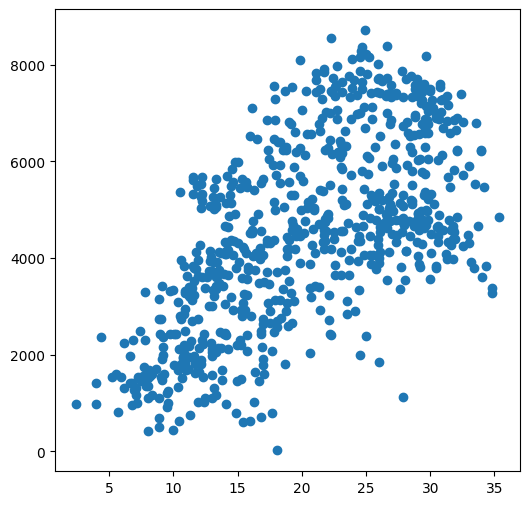

In [ ]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(share_bike_data.temp, share_bike_data.cnt)
plt.show()

There's a very noticable correlation between **"temp"** and **"cnt"**

## **Step 5 : Building a Linear Model**

### **Automatic Feature selection using RFE**

In [ ]:
# Defining target variable

y_train = share_bike_train.pop('cnt')
X_train = share_bike_train

In [ ]:
# Recursive feature elimination

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [ ]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')

In [ ]:
# Checking rejected columns by RFE

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [ ]:
# Generic function to calculate VIF of variables

def computeVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [ ]:
# Dataframe of RFE supported features
X_train_rfe_sup = X_train[col]

In [ ]:
# Checking the VIF of features that are selected by RFE

computeVIF(X_train_rfe_sup)

,Features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Misty,2.29
0,year,2.09
9,sat,1.98


* humidity has very high VIF which is not acceptable for linear model

### **Building Models**

In [ ]:
# Building 1st linear regression model

X_train_rfe_lm = sm.add_constant(X_train_rfe_sup)
lr_model_1 = sm.OLS(y_train,X_train_rfe_lm).fit()
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          4.22e-191
Time:                        04:35:48   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

In [ ]:
# As humidity shows high VIF values hence we can drop it
X_train_rfe_new = X_train_rfe_sup.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
computeVIF(X_train_rfe_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,year,2.08
13,winter,1.98
8,sat,1.97
5,jan,1.62
6,july,1.59


In [ ]:
# Building 2nd linear regression model

X_train_rfe_lm_2 = sm.add_constant(X_train_rfe_new)
lr_model_2 = sm.OLS(y_train,X_train_rfe_lm_2).fit()
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          1.60e-188
Time:                        04:35:48   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

In [ ]:
# We can drop holiday variable as it has high p-value
X_train_rfe_new_2 = X_train_rfe_new.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
computeVIF(X_train_rfe_new_2)

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
10,spring,2.99
11,summer,2.33
0,year,2.08
12,winter,1.91
7,sat,1.84
4,jan,1.62
5,july,1.59


In [ ]:
# Building 3rd linear regression model

X_train_rfe_lm_3 = sm.add_constant(X_train_rfe_new_2)
lr_model_3 = sm.OLS(y_train,X_train_rfe_lm_3).fit()
print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          8.68e-189
Time:                        04:35:48   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1657      0.031      5.

In [ ]:
# We can drop jan variable as it has comparetively high p-value
X_train_rfe_new_3 = X_train_rfe_new_2.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
computeVIF(X_train_rfe_new_3)

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
9,spring,2.38
10,summer,2.32
0,year,2.07
11,winter,1.91
6,sat,1.83
4,july,1.58
8,Misty,1.57


In [ ]:
# Building 4th linear regression model

X_train_rfe_lm_4 = sm.add_constant(X_train_rfe_new_3)
lr_model_4 = sm.OLS(y_train,X_train_rfe_lm_4).fit()
print(lr_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          7.12e-189
Time:                        04:35:48   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1492      0.031      4.

In [ ]:
# We can drop july variable as it has comparetively high p-value
X_train_rfe_new_4 = X_train_rfe_new_3.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
computeVIF(X_train_rfe_new_4)

,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
8,spring,2.30
0,year,2.07
9,summer,2.00
5,sat,1.83
10,winter,1.76
7,Misty,1.57
4,sep,1.23


In [ ]:
# Building 5th linear regression model

X_train_rfe_lm_5 = sm.add_constant(X_train_rfe_new_4)
lr_model_5 = sm.OLS(y_train,X_train_rfe_lm_5).fit()
print(lr_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          1.42e-188
Time:                        04:35:48   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1406      0.031      4.

* Now the Model no 5 seems prominent and doesn't shows any considerable Multicolinearity in between the predictors.
* And from the p-values we can say that all the remaining features are significant to the module.
* F-Statistics value of 233.6 (which is greater than 1) and the p-value of 1.42e-188 i.e almost equals to zero, states that the overall model is significant.

In [ ]:
#Glance at the coefficient and parameters values
lr_model_5.params

const             0.140578
year              0.234402
workingday        0.055472
temp              0.479554
windspeed        -0.150006
sep               0.087256
sat               0.066696
Light_snowrain   -0.289256
Misty            -0.080390
spring           -0.055396
summer            0.062598
winter            0.095793
dtype: float64

## **Step 6 Residual Analysis**

**In Residual Analysis we check below mentioned characteristics,**
*   Normality of Error Terms
*   Multicolinearity
*   Linearity
*   Homoscedasticity
*   Indepedance of residuals



In [ ]:
y_train_pred = lr_model_5.predict(X_train_rfe_lm_5)

### **Normality of Error Terms**

Text(0.5, 0, 'Errors')

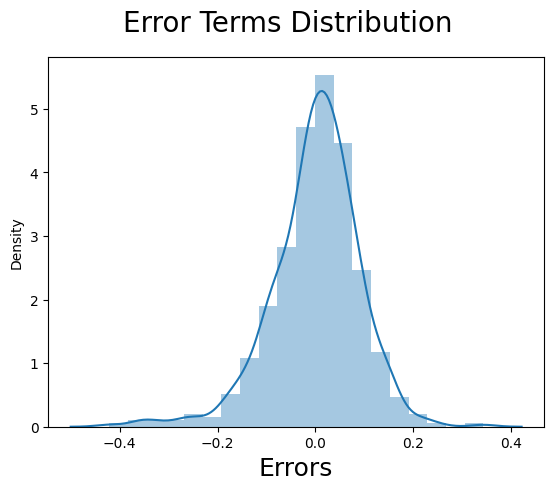

In [ ]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot(lr_model_5.resid, bins = 20)
fig.suptitle('Error Terms Distribution', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

### **Multicolinearity**

In [ ]:
computeVIF(X_train_rfe_new_4)

,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
8,spring,2.30
0,year,2.07
9,summer,2.00
5,sat,1.83
10,winter,1.76
7,Misty,1.57
4,sep,1.23


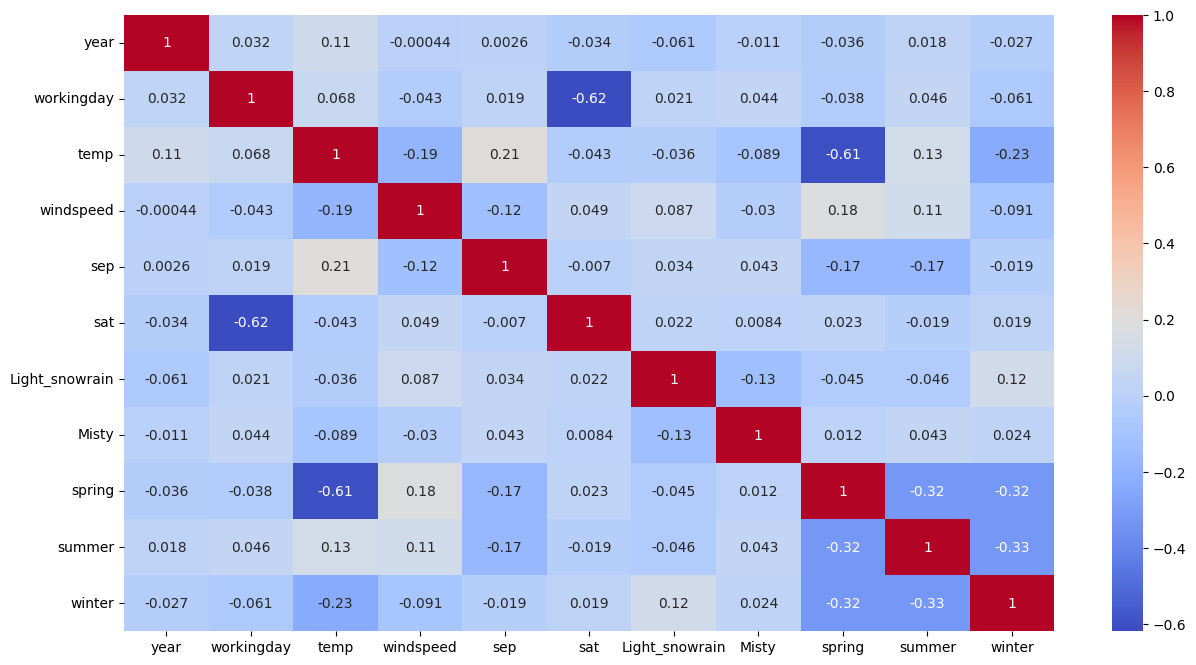

In [ ]:
# Let's check pairwise correlation
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe_new_4.corr(),annot = True, cmap="coolwarm")
plt.show()

VIF values are around 5 which is good and also there is no multicolinearity and there are no high correlation between the features as seen from the heatmap.

### **Linearity**



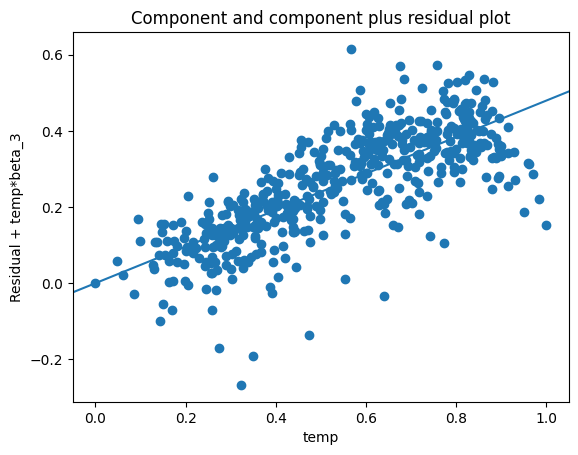

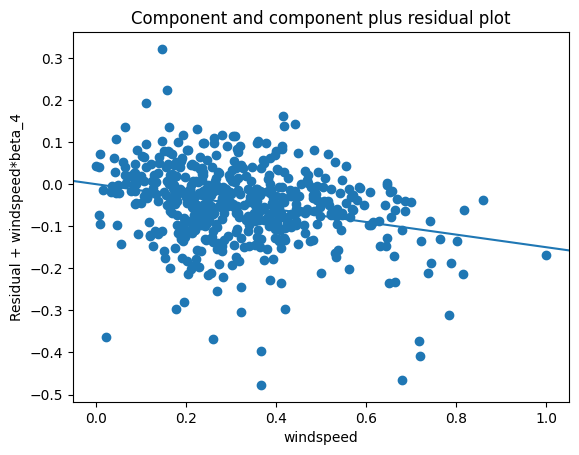

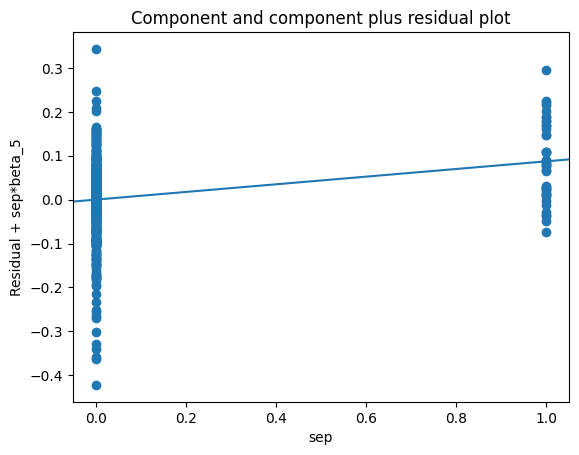

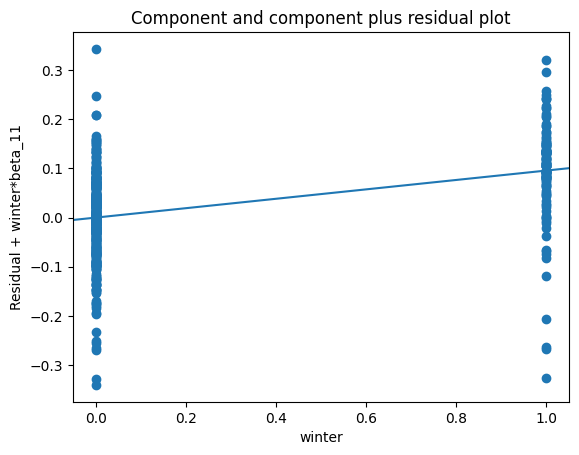

In [ ]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot for some continuos and categorical variables

sm.graphics.plot_ccpr(lr_model_5, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_model_5, 'windspeed')
plt.show()

sm.graphics.plot_ccpr(lr_model_5, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_model_5, 'winter')
plt.show()

### **Homoscedasticity**

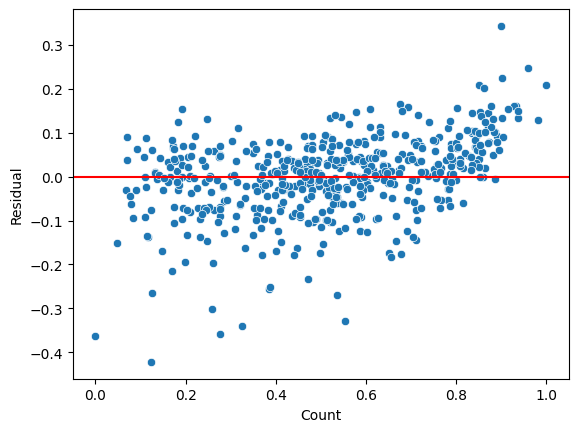

In [ ]:
sns.scatterplot(x=y_train, y=lr_model_5.resid)
plt.axhline(y=0, color='red', linestyle='-')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

### **Independance of Variable**

In [ ]:
# Obtain Durbin-Watson statistic
durbin_watson_stat = sm.stats.stattools.durbin_watson(lr_model_5.resid)
durbin_watson_stat

2.082808143491353

**Interpreting Durbin-Watson statistic values:**

> * Near 2: This is the ideal scenario and suggests no autocorrelation in the residuals.
* Between 0 and 2: Indicates positive autocorrelation, with values closer to 0 suggesting stronger positive autocorrelation.
* Between 2 and 4: Indicates negative autocorrelation, with values closer to 4 suggesting stronger negative autocorrelation.

## **Step 7 : Making predictions using final model**

Now we have fairly good model upon which we can make predictions, but before that let's scale the test data.

In [ ]:
# Scaling the test dataset using minmax scaler

cont_vars = ['temp','atemp','humidity','windspeed','cnt']
share_bike_test[cont_vars] = scaler.transform(share_bike_test[cont_vars])
share_bike_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
y_test = share_bike_test.pop('cnt')
X_test = share_bike_test

In [ ]:
X_test = X_test[X_train_rfe_new_4.columns]

# Adding constants to the test dataset
X_test_lm_5 = sm.add_constant(X_test)

In [ ]:
y_test_pred = lr_model_5.predict(X_test_lm_5)

# Calculating Rsquare on predicted data for test set
r2 = r2_score(y_test, y_test_pred)
round(r2,6)

0.806335

## **Step 8 : Evaluation of Model**

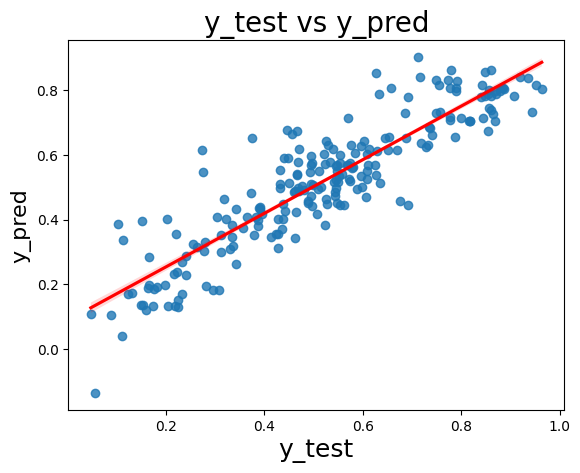

In [ ]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [ ]:
# Let's derive the final equation of the model

lr_model_5.params

const             0.140578
year              0.234402
workingday        0.055472
temp              0.479554
windspeed        -0.150006
sep               0.087256
sat               0.066696
Light_snowrain   -0.289256
Misty            -0.080390
spring           -0.055396
summer            0.062598
winter            0.095793
dtype: float64

So as we can see that the equation of our best fitted line is:

$ cnt = 0.140578 + 0.234402  \times  year + 0.055472  \times  workingday + 0.479554 \times temp - 0.150006 \times windspeed + 0.087256 \times sep + 0.066696 \times sat - 0.289256 \times Light_snowrain - 0.080390 \times Misty - 0.055396 \times spring + 0.062598 \times summer + 0.095793 \times winter $

**Now to compare both models let's calculate the adjusted Rsquare for test data**

In [ ]:
# Calculate adjusted R-squared
num_predictors = X_test.shape[1] - 1  # Exclude the constant term
num_samples = X_test.shape[0]
adjusted_r_squared = 1 - (1 - r2) * ((num_samples - 1) / (num_samples - num_predictors - 1))
adjusted_r_squared

0.797069255852203

# **Model comparison between Training and Testing dataset:**
>* $ Train \hspace{1mm} dataset \hspace{1mm} R^2 : 0.838 $
* $ Test \hspace{1mm} dataset \hspace{1mm} R^2 : 0.806 $
* $ Train \hspace{1mm} dataset\hspace{1mm} Adjusted \hspace{1mm} R^2 : 0.834 $   
* $ Test \hspace{1mm} dataset \hspace{1mm} Adjusted \hspace{1mm} R^2  : 0.797 $

Demand of bikes depend on features like, $ year,\hspace{1mm} workingday,\hspace{1mm} temp,\hspace{1mm} windspeed,\hspace{1mm} sep,\hspace{1mm} sat,\hspace{1mm} Light\_snowrain,\hspace{1mm} Misty,\hspace{1mm} spring,\hspace{1mm} summer\hspace{1mm} \& \hspace{1mm} winter $.